In [3]:
import pandas as pd
%matplotlib inline
import os, sys
import itertools
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings("ignore")

In [5]:
import glob

path = 'C:\\Users\\e394102\\Box\\SWPA Work\\OngoingProjects\\Leadership_Analysis\\'

files = [f for f in glob.glob(path + "**/*.csv", recursive=True)]

for f in files:
    print(f)

C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\data_for_viz_correlation.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\feat_importances_org_risk.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\leaders_job.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\ml_file.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\ml_file_ComboYears.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\model_test.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\org_historic_data.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\org_historic_data_v1.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\recent_data.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\risk_df.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leadership_Analysis\scores.csv
C:\Users\e394102\Box\SWPA Work\OngoingProjects\Leade

In [6]:
ml_join_file = "C:\\Users\\e394102\\Box\\SWPA Work\\OngoingProjects\\Leadership_Analysis\\ml_file_ComboYears.csv"

df = pd.read_csv(ml_join_file, encoding = "ISO-8859-1")

# shuffle dataframe
df = shuffle(df)

# look at the first few rows. 
df.head()

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


#df.rename(columns={'mgr_supv_id_lm':'managerid'}, inplace=True)

list(df.columns)

['unnamed:_0',
 'x1',
 'emplid',
 'name',
 'employeestatus',
 'recordtype',
 'headcount',
 'domestic_headcount',
 'leader_headcount',
 'domestic_leader_headcount',
 'exec_headcount',
 'domestic_exec_headcount',
 'women_headcount',
 'women_leader_headcount',
 'women_exec_headcount',
 'minority_headcount',
 'minority_leader_headcount',
 'minority_exec_headcount',
 'veteran_headcount',
 'pwd_headcount',
 'first_line_leader_count',
 'pye_zt5_headcount',
 'zt5_headcount',
 'pye_se_rated_headcount',
 'se_rated_headcount',
 'pye_other_rated_headcount',
 'other_rated_headcount',
 'hirecount',
 'women_hire_count',
 'minority_hire_count',
 'veteran_hire_count',
 'pwd_hire_count',
 'termcount',
 'leader_term_count',
 'women_term_count',
 'minority_term_count',
 'veteran_term_count',
 'pwd_term_count',
 'pye_zt5_term_count',
 'zt5_term_count',
 'pye_se_rated_term_count',
 'se_rated_term_count',
 'pye_other_rated_term_count',
 'other_rated_term_count',
 'transfer-in_count',
 'domestic_transfer-in_c


## Use classification pool function 

In [7]:
pd.value_counts(df['jobfamily'].values, sort=True)

tech           31110
prdmnt         11809
non_tech       10448
other           4789
office_clar     1113
exec             293
dtype: int64

In [8]:
# categorical variables

cat_vars = [var for var in df.columns if df[var].dtypes =="O"]

print('name of categorical variables: ',cat_vars)
print('number of categorical variables: ',len(cat_vars))

name of categorical variables:  ['name', 'employeestatus', 'recordtype', 'gender', 'ethnicity_descr', 'minority', 'veteranstatus', 'personwithdisability', 'birthdate', 'generations', 'highest_education_level', 'highest_education_level_descr', 'email', 'managername', 'hrbp_name', 'businessunitid', 'businessunitname', 'ttoc_id', 'lob_function', 'lob_function_group', 'oc_id', 'oc_name', 'alt_dept_id', 'alt_dept_name', 'alt_dept_lob', 'setid', 'dept_id', 'department', 'elt', 'slt', 'subslt', 'subsubslt', 'searchhierarchy', 'searchmanager', 'leveltype', 'level', 'levelname', 'jobcode', 'jobtitle', 'jobdiscipline', 'jobfunction', 'jobfamily', 'uniondescr', 'fulltime_parttime', 'flsa_status', 'co-op_intern', 'repped_wd', 'employeetype', 'employeeclassid', 'employeeclassdescr', 'indirect_direct', 'servicedate', 'yos_grouping', 'locationname', 'city', 'state_short', 'state', 'country_short', 'country', 'locationgroup', 'reviewrating', 'ratingsubgroup', 'ratinggroup', 'reviewdate', 'currency', '

In [29]:
#def analyse_rare_labels(df, var, rare_perc):
#    df = df.copy()
#    tmp = df.groupby(var)['leader_effect_mean'].count() / len(df)
#    return tmp[tmp<rare_perc]

#for var in cat_vars: 
#    print(analyse_rare_labels(df, var, 0.05))
#    print()

## simple approach to feature importance

In [30]:
columns_of_interest = ['emplid', 
                  #     'headcount',
                  #       'domestic_headcount',
                  #       'leader_headcount',
                  #       'domestic_leader_headcount',
                  #       'exec_headcount',
                  #       'domestic_exec_headcount',
                  #       'women_headcount',
                  #       'women_leader_headcount',
                  #       'women_exec_headcount',
                  #       'minority_headcount',
                  #       'minority_leader_headcount',
                  #       'minority_exec_headcount',
                  #       'veteran_headcount',
                  #       'pwd_headcount',
                  #       'first_line_leader_count',
                  #       'pye_zt5_headcount',
                  #       'zt5_headcount',
                  #       'pye_se_rated_headcount',
                  #       'se_rated_headcount',
                  #       'pye_other_rated_headcount',
                  #       'other_rated_headcount',
                  #       'hirecount',
                  #       'women_hire_count',
                  #       'minority_hire_count',
                  #       'veteran_hire_count',
                  #       'pwd_hire_count',
                  #       'termcount',
                  #       'leader_term_count',
                  #       'women_term_count',
                  #       'minority_term_count',
                  #       'veteran_term_count',
                  #       'pwd_term_count',
                  #       'pye_zt5_term_count',
                  #       'zt5_term_count',
                  #       'pye_se_rated_term_count',
                  #       'se_rated_term_count',
                  #       'pye_other_rated_term_count',
                  #       'other_rated_term_count',
                  #       'transfer-in_count',
                  #       'domestic_transfer-in_count',
                  #       'women_transfer-in_count',
                  #       'minority_transfer-in_count',
                  #       'transfer-out_count',
                  #       'domestic_transfer-out_count',
                  #       'women_transfer-out_count',
                  #       'minority_transfer-out_count',
                  #       'promotion_count',
                  #       'domestic_promo_count',
                  #       'domestic_promo_into_leadership_count',
                  #       'promo_into_leadership_count',
                  #       'women_promo_into_leadership_count',
                  #       'minority_promo_into_leadership_count',
                  #       'promo_within_leadership_count',
                  #       'domestic_promo_within_leadership_count',
                  #       'women_promo_within_leadership_count',
                  #       'minority_promo_within_leadership_count',
                         ### Org Type variables 
                       'lob_function',
                       'lob_function_group',
                       'alt_dept_lob',
                       'uniondescr', 
                       ## employee and team variables 

                        'indirect_direct',
                    #    'reghours', 'overtimehours', 'unpaidovertimehours', 'totalhours', 
                    #    'age', 
                       'levelnumber', 'yos', 'locationgroup', 'reviewrating', 'annualized_rate', 
                        'comparatio', 
                       #'retirelikelihood', 'retirepotential',
                      #   'paygroup', 
                       'numofemployees','fulltime_parttime', 
                         'numoflayers', 'servicestype', 
                       #'generations', 
                       'highest_education_level_descr',
                       
                       ## time in L code for the manager 
                       ## any other details about the manager 
                       ## Time in Level 
                       ## YOS
                       ## how satisfied is the manager or other scores for the actual manager 
                       
                     'manager_level',
                  #   'manager_minority_count',
                  #   'manager_zt5_count',
                  #   'mngr_minority',
                  #   'manager_age',
                     'manager_yos',
                  #   'manager_rating',
                     'manager_rate',
                     'manager_comparatio',
                  #   'manager_gender',
                     'manager_numofemployees',
                     'manager_numoflayers',
                       

                       ## job discipline cols
                       'role','jobfamily', 'flsa_status',

                         'leader_effect_mean', 
                       #  'leader_cat'
                     # 'lm_great'  ## add lm as the predictor 
                      ]




ei_join_sub = df[columns_of_interest]


#ei_join_sub.head()


In [12]:
list(ei_join_sub.columns)

['emplid',
 'lob_function',
 'lob_function_group',
 'alt_dept_lob',
 'uniondescr',
 'indirect_direct',
 'levelnumber',
 'yos',
 'locationgroup',
 'reviewrating',
 'annualized_rate',
 'comparatio',
 'numofemployees',
 'fulltime_parttime',
 'numoflayers',
 'servicestype',
 'highest_education_level_descr',
 'manager_level',
 'manager_yos',
 'manager_rate',
 'manager_comparatio',
 'manager_numofemployees',
 'manager_numoflayers',
 'role',
 'jobfamily',
 'flsa_status',
 'leader_effect_mean']

In [13]:
#ei_join_sub.to_csv('data_for_viz_correlation.csv')
ei_join_sub['annualized_rate'] = ei_join_sub['annualized_rate'].fillna((ei_join_sub['annualized_rate'].mean()))
ei_join_sub['levelnumber'] = ei_join_sub['levelnumber'].fillna((ei_join_sub['levelnumber'].mean()))
ei_join_sub['numoflayers'] = ei_join_sub['numoflayers'].fillna((ei_join_sub['levelnumber'].mean()))
ei_join_sub['manager_level'] = ei_join_sub['manager_level'].fillna((ei_join_sub['manager_level'].mean()))


ei_join_sub['levelnumber'] = ei_join_sub['levelnumber'].astype(str)
ei_join_sub['numoflayers'] = ei_join_sub['numoflayers'].astype(str)
ei_join_sub['manager_level'] = ei_join_sub['manager_level'].astype(str)



In [16]:
def encode_and_bind(original_dataframe, feature_to_encode):
    
    two_df = original_dataframe[feature_to_encode]

    dummies_df = pd.get_dummies(two_df)

    df_join = pd.concat([original_dataframe.reset_index(drop=True),dummies_df.reset_index(drop=True)], axis=1)

    ## drop those columns now that they are dummy variables 
    df_join = df_join.drop(feature_to_encode, axis=1) 
    
    # clean up the index 
    df_join = df_join.reset_index(drop=True) # reset index
    
    return df_join


columns_of_interest2 = list(ei_join_sub.select_dtypes(['object']).columns)


df_join = encode_and_bind(ei_join_sub, columns_of_interest2)


In [18]:
print("leadership effectiveness median score: ", np.median(df_join.leader_effect_mean))  
print("leadership effectiveness mean score: ", np.mean(df_join.leader_effect_mean)) 


data_reduce = df_join

leadership effectiveness median score:  4.2
leadership effectiveness mean score:  4.07869936938992


In [31]:
# drop nans if needed 
df_y = data_reduce #.dropna()


df_X = df_y.drop(["leader_effect_mean"], axis=1) 


df_X = df_X.reset_index(drop=True) # reset index

#df_X.head()

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = np.array(df_X)

y = np.array(df_y.leader_effect_mean) #iloc[:,1]) # terms
#y = np.array(df_y.leader_cat)

train_x_input, test_x_input, train_y_input, test_y_input = train_test_split(X, y, 
                                                                            test_size=0.20, 
                                                                            random_state=1) 

regr = RandomForestRegressor(n_jobs = -1, max_depth=20, bootstrap = 'true', min_samples_leaf = 3, 
                                               n_estimators=750, min_samples_split = 5, random_state= 2017)

regr.fit(train_x_input, train_y_input)

y_pred = regr.predict(test_x_input)
y_pred

array([4.24540909, 4.19228166, 4.20742816, ..., 4.2984775 , 4.10945203,
       4.42550194])

In [22]:
rmse = np.sqrt(mean_squared_error(test_y_input, y_pred))
rmse

0.18850296422405013

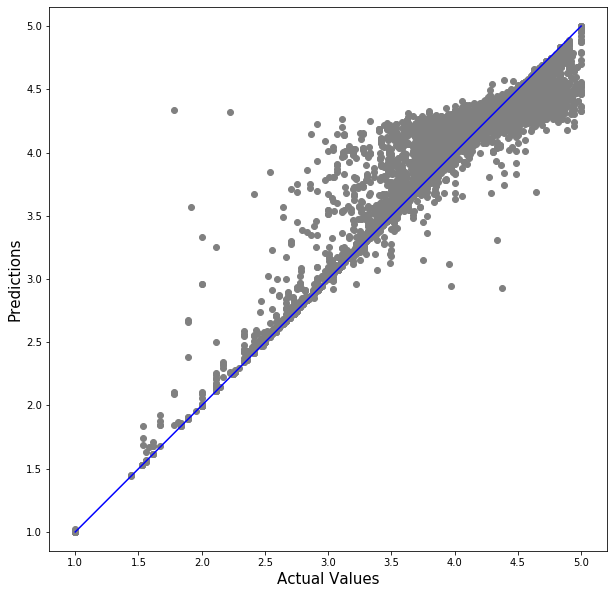

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(test_y_input, y_pred, c='grey')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(test_y_input))
p2 = min(min(y_pred), min(test_y_input))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [26]:
# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset

X = np.array(df_X)

y = np.array(df_y.leader_effect_mean) #iloc[:,1]) # terms


train_x_input, test_x_input, train_y_input, test_y_input = train_test_split(X, y, 
                                                                            test_size=0.10, 
                                                                            random_state=1) 

model = GradientBoostingRegressor(max_depth=30, max_features = 'sqrt',
                                                min_samples_leaf = 1, learning_rate = 0.011,
                                               n_estimators=1800, min_samples_split = 10, random_state= 2017)

model.fit(train_x_input, train_y_input)

y_pred = model.predict(test_x_input)
y_pred

rmse = np.sqrt(mean_squared_error(test_y_input, y_pred))
#print('testing data:', rmse)

print(rmse)


0.14583113106345405


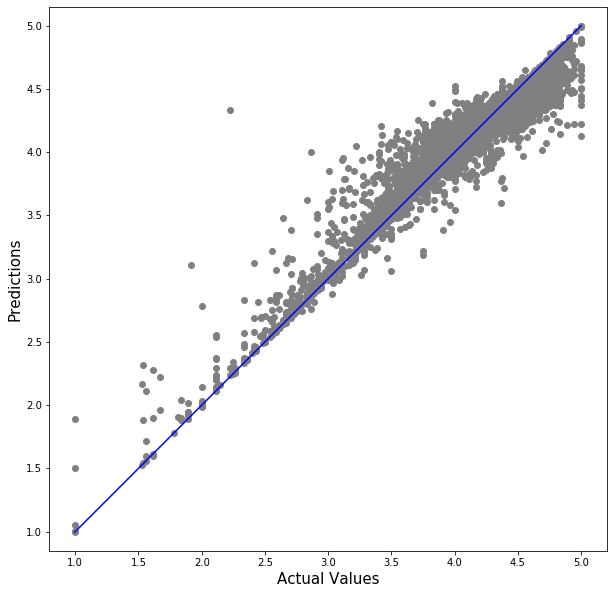

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(test_y_input, y_pred, c='grey')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(test_y_input))
p2 = min(min(y_pred), min(test_y_input))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## End Notebook 